# Import libraries

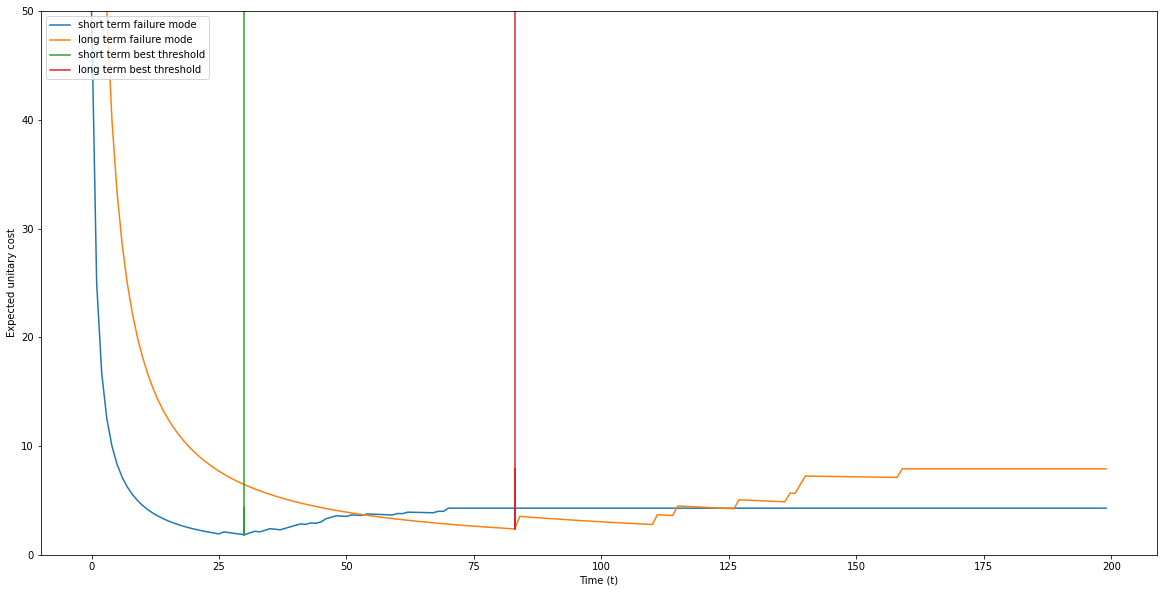

In [1]:
import time
from Asset_degradation import *

# Global variables

In [ ]:
short_term = Failure_mode_degradation(10, 100, 2, 4, [], 100, 50, 200)
long_term = Failure_mode_degradation(0, 200, 0.1, 2, [], 200, 200, 1000)
shock_threshold = 50
lameda_shocks = 0.5 #shocks per time step
shock_intensity_mean = 7 #normal distribution
shock_intensity_stdev = 2 #normal distribution
simulating_periods = 1000

# What is missing?

In [3]:
#Falta corrigir o cálculo dos custos que não está correto. Tenho que calcular o valor esperado dos custos.

# Test developed functions

## Simulate degradation (example)

In [4]:
start_time = time.time()
short_term, long_term = simulate_degradation(long_term, short_term, shock_threshold, lameda_shocks, shock_intensity_mean, shock_intensity_stdev, simulating_periods)
print("--- Simulation computational time = %s seconds ---" % (time.time() - start_time))

--- Simulation computational time = 0.02772688865661621 seconds ---


## Get maintenance interventions (example)

In [5]:
st_teste = maintenance_interventions(short_term.degradation, short_term.initial_condition, short_term.failure_threshold)
lt_teste = maintenance_interventions(long_term.degradation, long_term.initial_condition, long_term.failure_threshold)

## Plot of the simulated degradation (example)

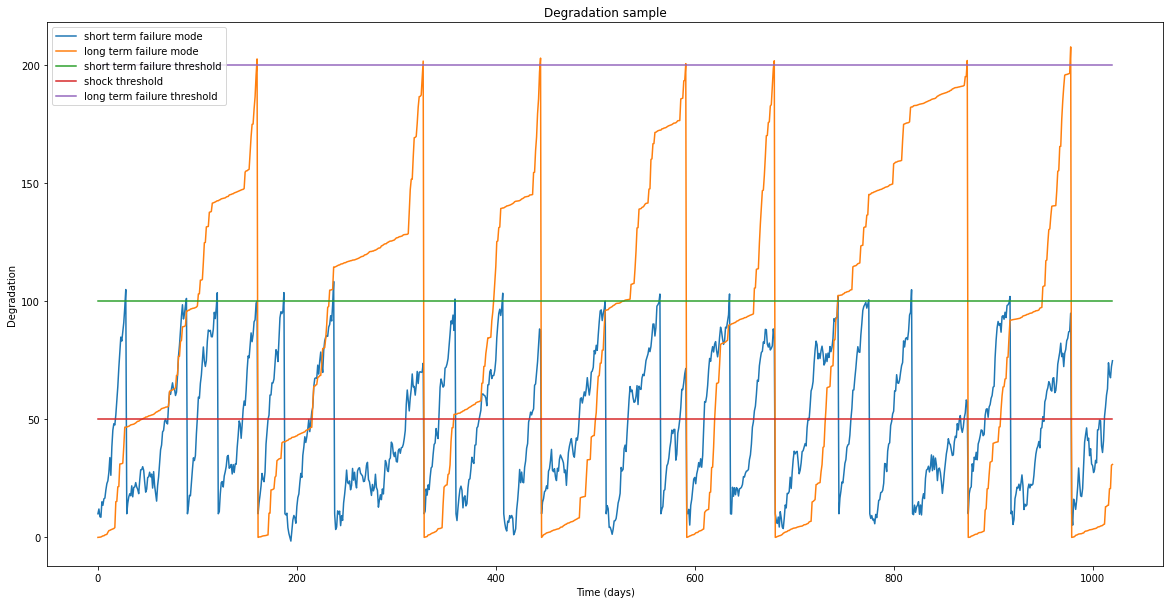

In [6]:
degradation_plot(short_term.degradation, short_term.failure_threshold, shock_threshold, long_term.degradation, long_term.failure_threshold)

# Test maintenance policies optimization - example for the Corrective Maintenance (CM)

In [7]:
#Compute maintenance policy
maintenance_policy = 'CM'
policy_step = 0.1
time_limit = 200
simulating_periods = 10000
st_expected_maintenance_cost_per_unit_of_time, lt_expected_maintenance_cost_per_unit_of_time = simulate_maintenance_policy(long_term, short_term, shock_threshold, lameda_shocks, shock_intensity_mean, shock_intensity_stdev, simulating_periods, maintenance_policy, time_limit, policy_step)

#Compute maintenance costs
cost = round(min(st_expected_maintenance_cost_per_unit_of_time) + min(lt_expected_maintenance_cost_per_unit_of_time), 2)
print(f'Expected maintenance cost per unit of time using a corrective maintenance policy = {cost}')

Expected maintenance cost per unit of time using a corrective maintenance policy = 10.5


# Test maintenance policies optimization - example for the Time Based Maintenance (TBM)

In [10]:
#Compute maintenance policy
maintenance_policy = 'TBM'
policy_step = 0.1
time_limit = 200
simulating_periods = 100000
st_expected_maintenance_cost_per_unit_of_time, lt_expected_maintenance_cost_per_unit_of_time = simulate_maintenance_policy(long_term, short_term, shock_threshold, lameda_shocks, shock_intensity_mean, shock_intensity_stdev, simulating_periods, maintenance_policy, time_limit, policy_step)

#Compute optimal decisions
lt_optimal_t = lt_expected_maintenance_cost_per_unit_of_time.index(min(lt_expected_maintenance_cost_per_unit_of_time)) * policy_step
st_optimal_t = st_expected_maintenance_cost_per_unit_of_time.index(min(st_expected_maintenance_cost_per_unit_of_time)) * policy_step
print(f'The long-term optimal replacement period is {lt_optimal_t} || The short-term optimal replacement period is {st_optimal_t}')

#Compute maintenance costs
cost = round(min(st_expected_maintenance_cost_per_unit_of_time) + min(lt_expected_maintenance_cost_per_unit_of_time), 2)
print(f'Expected maintenance cost per unit of time using a time based maintenance policy = {cost}')

The long-term optimal replacement period is 94.0 || The short-term optimal replacement period is 27.0
Expected maintenance cost per unit of time using a time based maintenance policy = 5.01


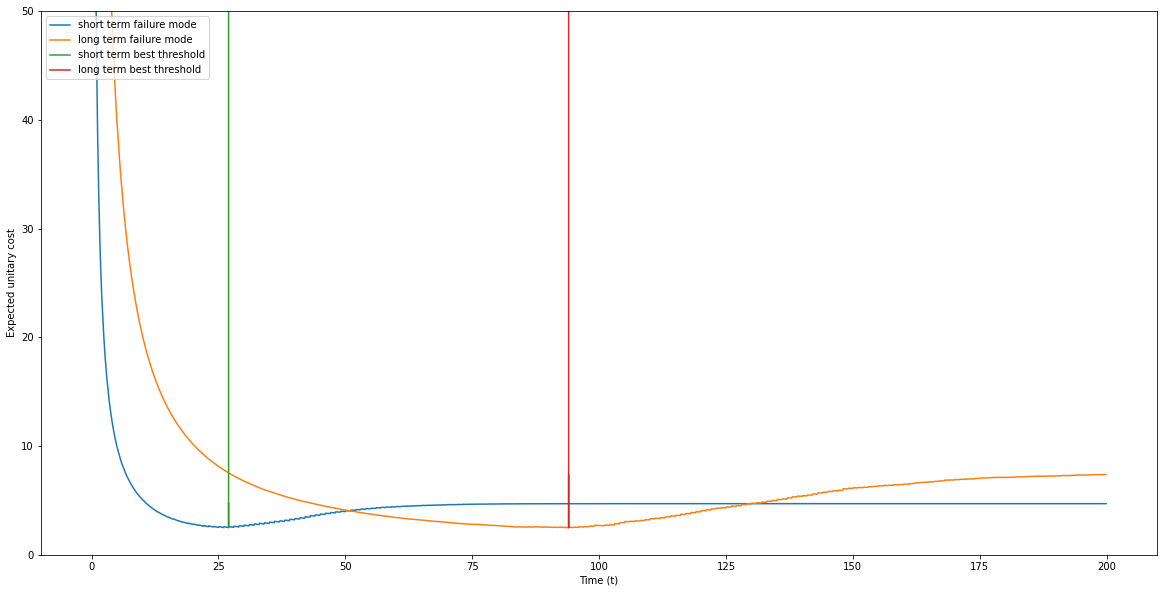

In [11]:
policy_costs_plot(st_expected_maintenance_cost_per_unit_of_time, lt_expected_maintenance_cost_per_unit_of_time, time_limit, policy_step, "Time (t)", 50)

# Test maintenance policies optimization - example for the Continuous Based Maintenance with perfect continuous inspection (CBM)

In [14]:
#Compute maintenance policy
maintenance_policy = 'CBM'
policy_step = 1
condition_limit = 200
simulating_periods = 1000
results_index, st_expected_maintenance_cost_per_unit_of_time, lt_expected_maintenance_cost_per_unit_of_time = simulate_maintenance_policy(long_term, short_term, shock_threshold, lameda_shocks, shock_intensity_mean, shock_intensity_stdev, simulating_periods, maintenance_policy, condition_limit, policy_step)

5